In [198]:
#regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


In [199]:
df=pd.read_csv('Housing.csv')

df.head()

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [200]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [201]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [203]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [204]:
#converting binary to 1 and 0
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'semi-furnished':1,'unfurnished':0,'furnished':2})

In [205]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [206]:
y=df['price']
X=df[['area','bedrooms','bathrooms','hotwaterheating','airconditioning','parking','furnishingstatus']]

In [207]:
X.head()

,area,bedrooms,bathrooms,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,0,1,2,2
1,8960,4,4,0,1,3,2
2,9960,3,2,0,0,2,1
3,7500,4,2,0,1,3,2
4,7420,4,1,0,1,2,2


In [208]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [209]:
#split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

#train linear regression model
model=LogisticRegression() #initialise the model
model.fit(X_train,y_train) #ttainnthe model
model


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
#evaluate the model using mse
from sklearn.metrics import mean_squared_error

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 4322078240076.2197


In [211]:
X_train.shape, y_train.shape

((381, 7), (381,))

In [212]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X_train_pca=pca.fit_transform(X_train)

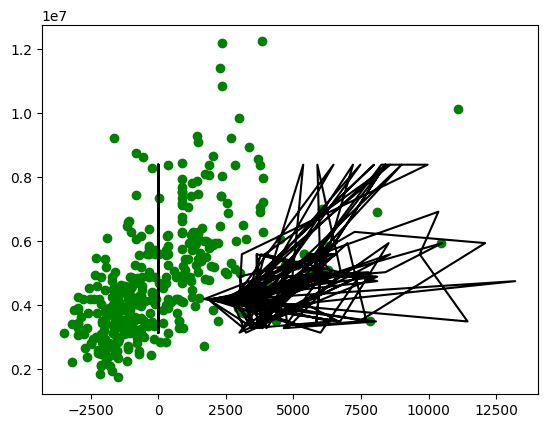

In [213]:
plt.scatter(x=X_train_pca, y=y_train, color='g')
plt.plot(X_test, y_pred, color='k')
plt.show()

In [216]:
data=[7400,3,1,1,1,2,2]
data=np.array(data).reshape(1,-1)
model.predict(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5950000])